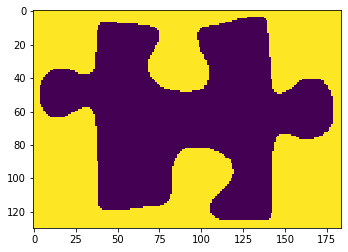

In [356]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("img/teile_second/0001.jpg")
h,w = img.shape[0:2]
#base[5:h+5,5:w+5]=img
#img = base
img2 = np.zeros((h+6,w+6, 3), dtype=np.uint8)
img2 = cv2.bitwise_not(img2)
img2[3:h+3,3:w+3] = img

gray   = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
h,w = gray.shape[0:2]
base_size = h+2, w+2
base = np.zeros(base_size, dtype=np.uint8)
thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)[1]

cv2.floodFill(thresh, base, (0,0), 255)
plt.imshow(base)
plt.show()
thresh = base

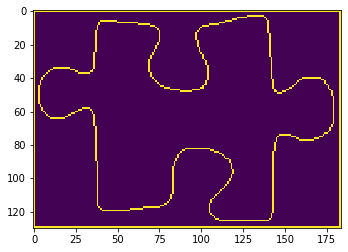

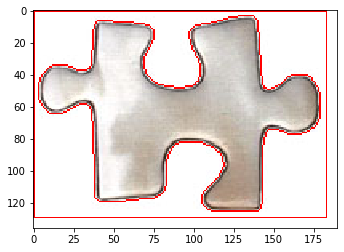

<function matplotlib.pyplot.show(*args, **kw)>

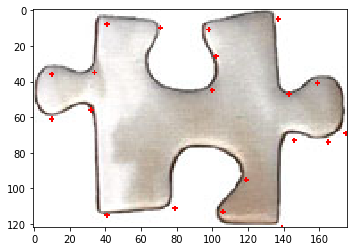

In [375]:
edges = cv2.Canny(thresh,100,255)
plt.imshow(thresh)
plt.show()
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_LIST  , cv2.CHAIN_APPROX_NONE) 

h,w = edges.shape[0:2]
img2 = np.zeros((h+6,w+6, 3), dtype=np.uint8)
img2 = cv2.bitwise_not(img2)
img = cv2.imread("img/teile_second/0001.jpg")
h,w = img.shape[0:2]
img2[4:h+4,4:w+4] = img

cv2.drawContours(img2, contours, -1, (255, 0, 0), 1) 
plt.imshow(img2)
plt.show()

corners = cv2.goodFeaturesToTrack(gray,20,0.1,10)
corners = np.int0(corners)


for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),1,255,-1)
plt.imshow(img)
plt.show